# Double layer NN for XOR

In [40]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

## NN 2 -> 2 -> 1 fitting just 4 data points (4 quadrants)

In [44]:
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)
feed_dict={X: x_data, Y: y_data}

In [42]:
# input & output
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

# 1st layer
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

# 2nd layer
W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1 - Y)*tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

## It does fit!

In [45]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(20001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 4000 == 0:
            print(step, sess.run(cost, feed_dict=feed_dict))

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict=feed_dict)
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.734504
4000 0.191731
8000 0.0234579
12000 0.011942
16000 0.00795735
20000 0.00595202

Hypothesis:  [[ 0.0057035 ]
 [ 0.99481589]
 [ 0.99210572]
 [ 0.00495272]] 
Correct:  [[ 0.]
 [ 1.]
 [ 1.]
 [ 0.]] 
Accuracy:  1.0


# XOR dataset from Python Machine Learning

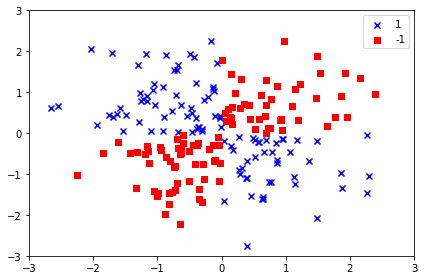

In [46]:
import matplotlib.pyplot as plt

np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()

In [52]:
x_data = X_xor.tolist()
y_data = ((y_xor>0)+0.0).reshape(-1,1).tolist()
feed_dict={X: x_data, Y: y_data}

## Trains the same 2 -> 2 -> 1 NN model

In [56]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(20001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 4000 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
            
    print( sess.run(accuracy, feed_dict={X: x_data, Y: y_data}) )
    y_pred = sess.run(predicted, feed_dict={X: x_data, Y: y_data})

0 0.772868
4000 0.50374
8000 0.485339
12000 0.47908
16000 0.475214
20000 0.472362
0.715


### Can't fit

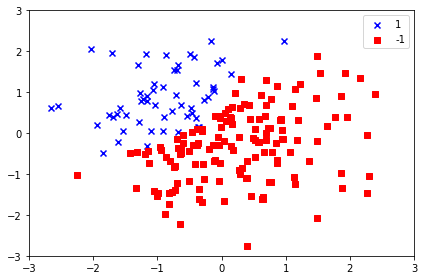

In [57]:
y_pred = np.squeeze(y_pred)

plt.scatter(X_xor[y_pred == 1, 0],
            X_xor[y_pred == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_pred == 0, 0],
            X_xor[y_pred == 0, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()

## Now let's try 2 -> 3 -> 3 -> 1 NN

In [59]:
# input & output
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

# 1st layer
W1 = tf.Variable(tf.random_normal([2, 3]), name='weight1')
b1 = tf.Variable(tf.random_normal([3]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

# 2st layer
W2 = tf.Variable(tf.random_normal([3, 3]), name='weight2')
b2 = tf.Variable(tf.random_normal([3]), name='bias2')
layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# 2nd layer
W3 = tf.Variable(tf.random_normal([3, 1]), name='weight3')
b3 = tf.Variable(tf.random_normal([1]), name='bias3')
hypothesis = tf.sigmoid(tf.matmul(layer2, W3) + b3)

# cost/loss function
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1 - Y)*tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [62]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(20001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 4000 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
            
    print( sess.run(accuracy, feed_dict={X: x_data, Y: y_data}) )
    y_pred = sess.run(predicted, feed_dict={X: x_data, Y: y_data})

0 0.999096
4000 0.241057
8000 0.0589988
12000 0.0314981
16000 0.0203876
20000 0.0144758
1.0


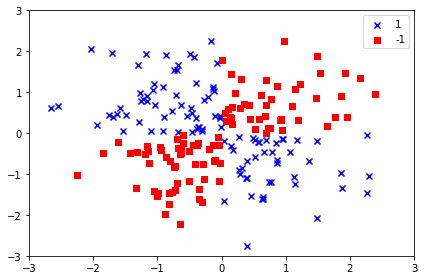

In [63]:
y_pred = np.squeeze(y_pred)

plt.scatter(X_xor[y_pred == 1, 0],
            X_xor[y_pred == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_pred == 0, 0],
            X_xor[y_pred == 0, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/xor.png', dpi=300)
plt.show()